# Dự đoán bệnh tiểu đường (Diabetes Prediction)

## 1. Import thư viện cần thiết và in ra cấu trúc thư mục

In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('../Machine-learning/'):
    # Bỏ qua thư mục .git nếu nó tồn tại
    if '.git' in dirname:
        continue  # Không duyệt vào .git

    for filename in filenames:
        print(os.path.join(dirname, filename))

../Machine-learning/Diabetes-Prediction.ipynb
../Machine-learning/diabetes.csv
../Machine-learning/id3-both-lib.py
../Machine-learning/id3-normal.py
../Machine-learning/id3-using-lib.py
../Machine-learning/kaggle.py
../Machine-learning/kaggle2.py
../Machine-learning/logistic-regression.py
../Machine-learning/logistic-using-lib.py
../Machine-learning/README.md


## 2. Loading the datasets

In [89]:
df=pd.read_csv("./diabetes.csv")

```
Pregnancies: Số lần mang thai.
Glucose: Mức glucose trong máu.
BloodPressure: Huyết áp.
SkinThickness: Độ dày da.
Insulin: Mức insulin.
BMI: Chỉ số BMI.
DiabetesPedigreeFunction: Chỉ số tiền sử gia đình về bệnh tiểu đường.
Age: Tuổi.
```

## 3. Phân tích dữ liệu khai phá
a. Hiểu dữ liệu
- Phần đầu của dữ liệu (head)
- Hình dạng của dữ liệu (shape)
- Các loại của các cột dữ liệu (dtype)
- Thông tin về tập dữ liệu  (info)
- Tóm tắt về tập dữ liệu    (describe)

In [90]:
df.head() #get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [92]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [93]:
df.dtypes #knowledge of data type helps for computation

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [94]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### KẾT LUẬN: Ta quan sát thấy giá trị min của một số cột là 0, điều này không thể xảy ra về mặt y khoa. Do đó, trong quá trình làm sạch dữ liệu, ta sẽ phải thay thế chúng bằng giá trị trung vị/trung bình tùy thuộc vào phân phối. Ngoài ra, trong cột max, ta có thể thấy mức insulin cao tới 846! ta phải xử lý các giá trị ngoại lệ

## b. Làm sạch dữ liệu
- Loại bỏ các giá trị trùng lặp
- Kiểm tra giá trị NULL (NULL values)
- Kiểm tra giá trị 0 và thay thế nó: - Về mặt y khoa, một số bản ghi dữ liệu không thể có giá trị 0 như Huyết áp hoặc mức Glucose. Do đó, ta thay thế chúng bằng giá trị trung bình của cột cụ thể đó.

In [96]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [97]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [98]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [99]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

## 4. Trực quan hóa dữ liệu
Ở đây ta sẽ trực quan hóa dữ liệu để hiểu rõ hơn về dữ liệu:
- **Count Plot (Biểu đồ đếm)**: Để xem tập dữ liệu có cân bằng hay không.
- **Histogram Plot (Biểu đồ Histogram)**: Để xem dữ liệu có phân phối chuẩn hay bị lệch.
- **Box Plot (Biểu đồ hộp)**: Để phân tích phân phối và xem các giá trị ngoại lai (outliers).
- **Scatter Plots (Biểu đồ phân tán)**: Để xem mối quan hệ giữa các biến.
- **Pair Plot (Biểu đồ cặp)**: Để tạo biểu đồ phân tán giữa tất cả các biến.

<Axes: xlabel='Outcome', ylabel='count'>

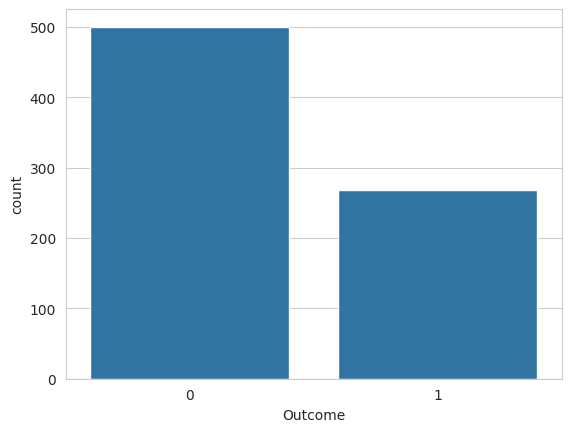

In [100]:
sns.countplot(x='Outcome', data=df) #countplot is used to show the counts of observations in each categorical bin using bars.

### Kết luận: ta nhận thấy rằng số người không mắc bệnh tiểu đường nhiều hơn nhiều so với số người mắc bệnh, điều này cho thấy dữ liệu của ta không cân bằng.

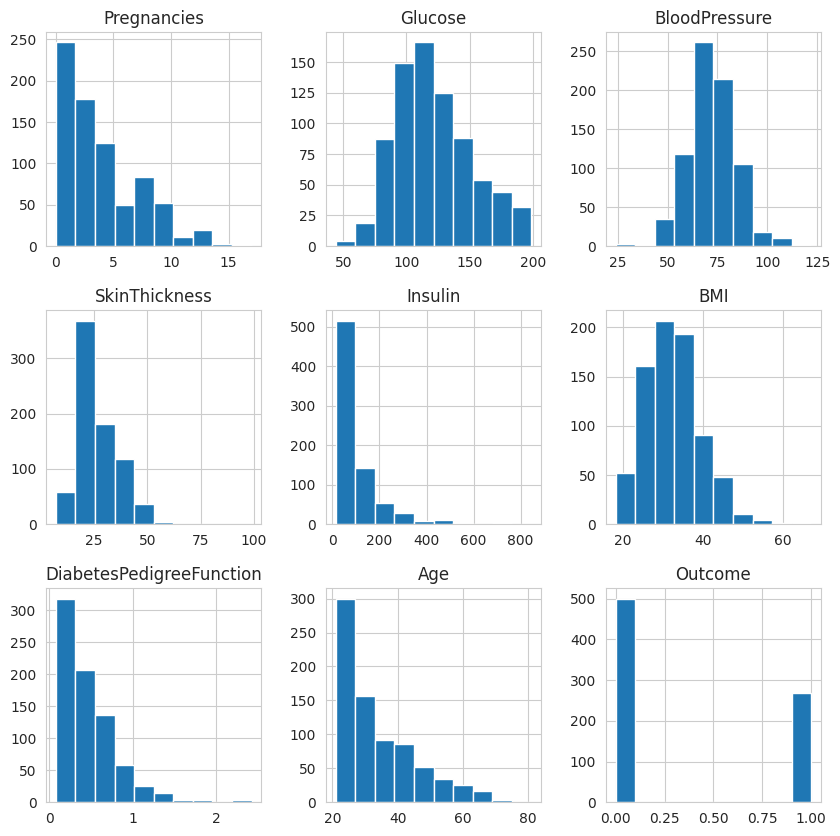

In [101]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### Kết luận: - Ta quan sát thấy chỉ có glucose và Huyết áp là phân phối chuẩn, còn lại bị lệch và có giá trị ngoại lai.

<Axes: xlabel='DiabetesPedigreeFunction'>

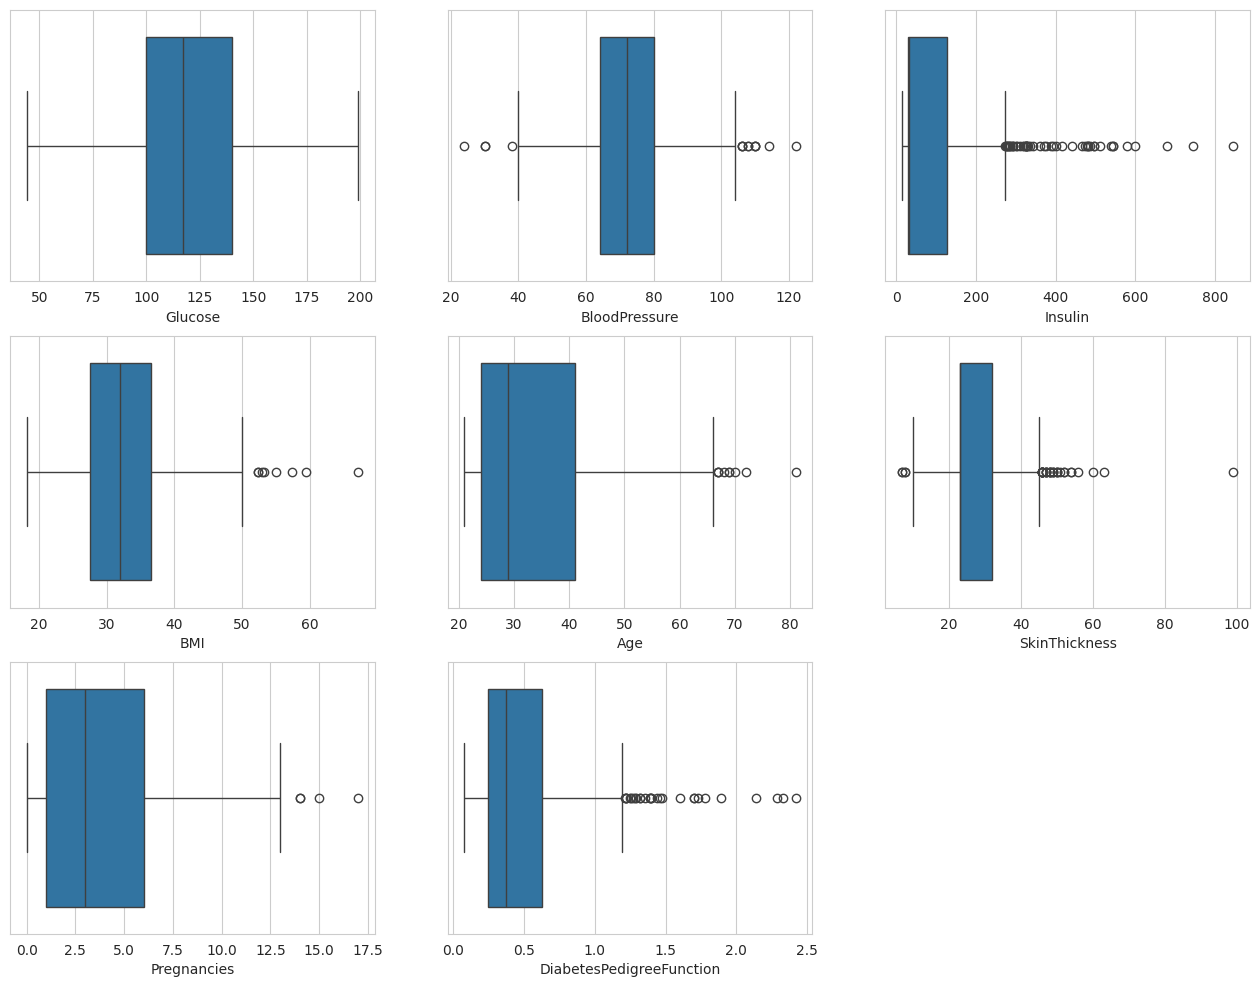

In [102]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

Giá trị ngoại lệ là các giá trị bất thường trong tập dữ liệu của bạn và chúng có thể làm sai lệch các phân tích thống kê và vi phạm các giả định của chúng. Do đó, việc xử lý chúng là vô cùng quan trọng. Trong trường hợp này, việc loại bỏ các giá trị ngoại lệ có thể gây mất dữ liệu nên chúng ta phải xử lý bằng nhiều kỹ thuật biến đổi và mở rộng khác nhau.

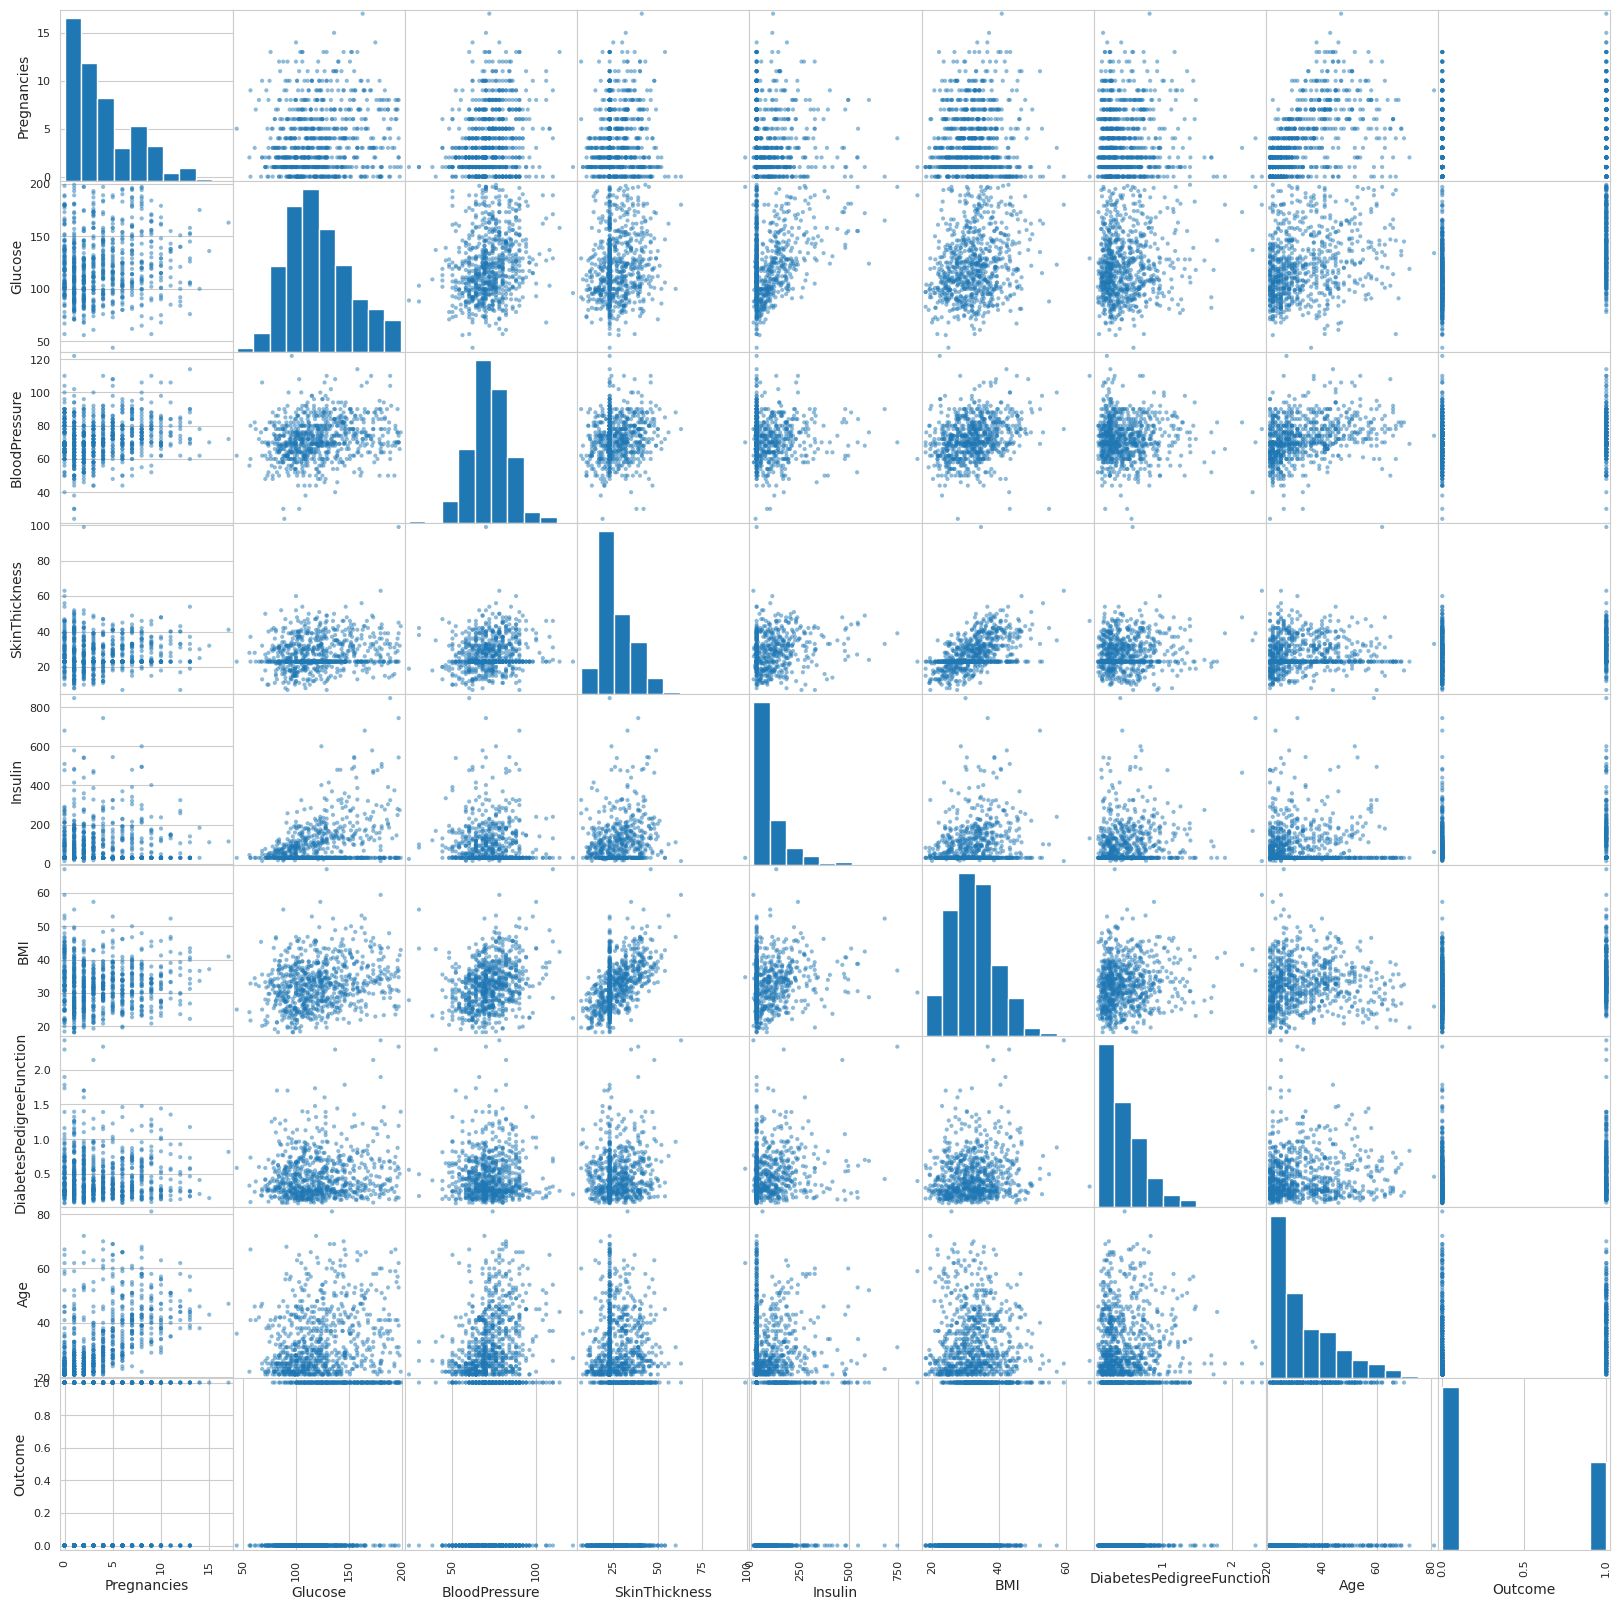

In [103]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to various conclusion looking at these plots for example  if you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number of pregnancies have lower insulin

## 5. Lựa chọn các thuộc tính

Hệ số tương quan Pearson: Giúp bạn tìm ra mối quan hệ giữa hai đại lượng. Nó cung cấp cho bạn thước đo về cường độ liên kết giữa hai biến. Giá trị của Hệ số tương quan Pearson có thể nằm trong khoảng từ -1 đến 1. 1 có nghĩa là chúng có tương quan cao và 0 có nghĩa là không có tương quan. Bản đồ nhiệt là biểu diễn thông tin hai chiều với sự trợ giúp của màu sắc. Bản đồ nhiệt có thể giúp người dùng trực quan hóa thông tin đơn giản hoặc phức tạp.

<Axes: >

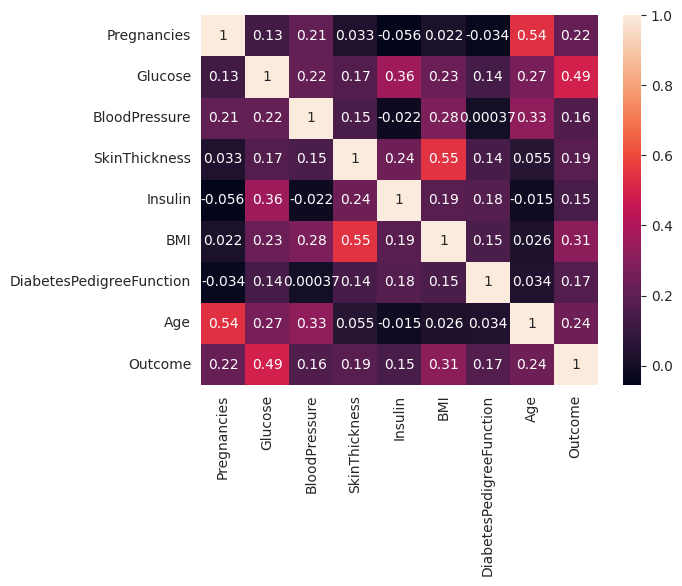

In [104]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

### KẾT LUẬN: - Quan sát hàng cuối cùng 'Outcome' (Kết quả) và lưu ý điểm tương quan của nó với các tính năng khác nhau. Chúng ta có thể quan sát thấy Glucose, BMI và Tuổi là những yếu tố có tương quan nhiều nhất với Kết quả. Huyết áp, Insulin, Bệnh tiểu đường/Chức năng phả hệ là những yếu tố có tương quan ít nhất, do đó chúng không đóng góp nhiều cho mô hình nên chúng ta có thể loại bỏ chúng.

In [105]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

## 6. Handling Outliers (Xử lý giá trị ngoại lai)

1 - Ngoại lệ là gì?

Một ngoại lệ là một điểm dữ liệu trong một tập dữ liệu khác xa với tất cả các quan sát khác.

2 - Làm thế nào chúng ta có thể xác định một ngoại lệ?

Sử dụng ô hộp

Sử dụng biểu đồ phân tán

Sử dụng điểm Z

Tôi đã sử dụng Box Plots ở trên trong bước trực quan hóa dữ liệu để phát hiện các ngoại lệ.

3 - Tôi xử lý các ngoại lệ như thế nào?

Biến áp lượng tử: - Phương pháp này biến đổi các tính năng theo phân phối thống nhất hoặc phân phối chuẩn. Do đó, đối với một đặc điểm nhất định, phép biến đổi này có xu hướng dàn trải các giá trị thường xuyên nhất. Nó cũng làm giảm tác động của các ngoại lệ (cận biên): do đó đây là một sơ đồ tiền xử lý mạnh mẽ.

Hãy thực hiện một phép biến đổi tỷ lệ tiêu chuẩn đơn giản và chuyển đổi lượng tử. Với tập dữ liệu này: -


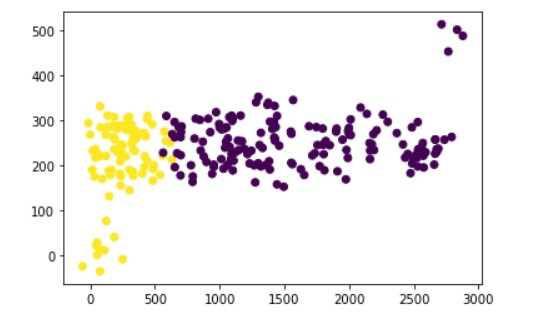

Chúng tôi thực hiện StandardScaler() về điều này và nhận được

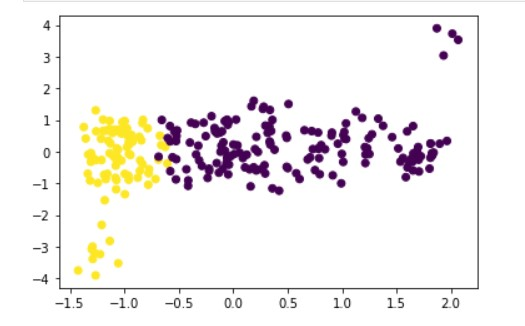

Trục Y có 8 đơn vị trong khi trục X chỉ có 3,5 đơn vị, cho thấy Các ngoại lệ đã ảnh hưởng đến thang đo

Sau khi áp dụng Chuyển đổi lượng tử, chúng ta nhận được

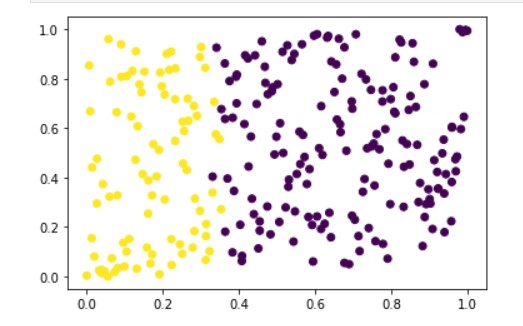

Trục Y và trục X có tỷ lệ bằng nhau. Các ngoại lệ vẫn còn hiện diện trong bộ dữ liệu này nhưng tác động của chúng đã giảm đi. Một trong những ví dụ này đã khiến tôi sử dụng máy biến áp này.

In [106]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: xlabel='SkinThickness'>

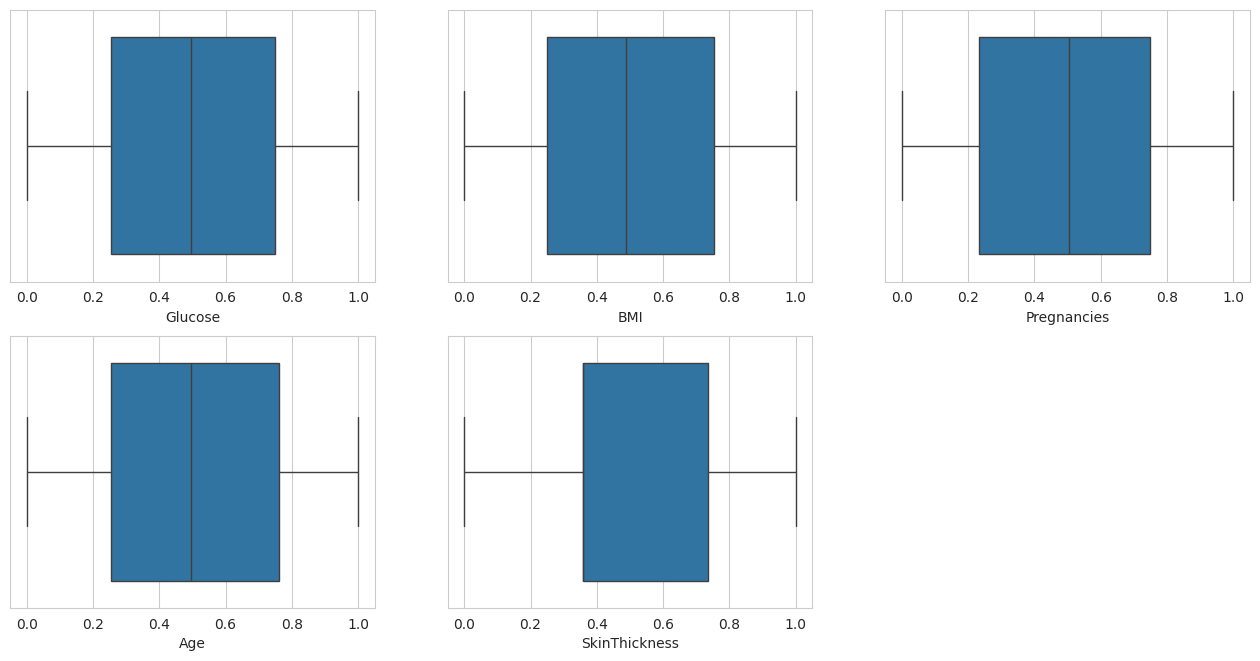

In [107]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

# 7. Split the Data Frame into X and y

In [108]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [109]:
X.head() # contains only independent features 

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [110]:
y.head() #contains dependent feature

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

# 8. Train test split
- Train dataset: 80%
- Test dataset: 20%

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [112]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [113]:
X_test.shape,y_test.shape

((154, 5), (154,))

## 9. Decision Tree (Sử dụng thuật toán ID3)

### 9.1. Sử dụng thư viện sklearn

* Import các thư viện cần thiết

In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

* Chuẩn hóa dữ liệu (nếu có)

In [115]:
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

* Huấn luyện mô hình

In [116]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

* Dự đoán với tập dữ liệu test

In [117]:
y_pred = tree.predict(X_test)

* Tính toán độ chính xác

In [118]:
def accuracy_score(y_test, y_pred):
    return np.sum(np.equal(y_test, y_pred))/len(y_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7597402597402597


## 10. Logistic Regression

1. Đầu vào và đầu ra của Logistic Regression

    Đầu vào:
        Một tập dữ liệu với nhiều đặc trưng (features). Ví dụ, trong bài toán dự đoán tiểu đường, các đặc trưng có thể là chỉ số đường huyết, BMI, số lần mang thai, tuổi, v.v.
        Mỗi mẫu trong tập dữ liệu sẽ bao gồm các giá trị của các đặc trưng này. Ví dụ:
        X=[Pregnancies, Glucose, BloodPressure, BMI, Age, ...]
        X=[Pregnancies, Glucose, BloodPressure, BMI, Age, ...]
        Nhãn (label) của mỗi mẫu là một giá trị nhị phân (0 hoặc 1), chỉ ra kết quả mà bạn muốn dự đoán. Trong bài toán dự đoán tiểu đường, nhãn là:
        y=[0,1](0: khoˆng ma˘ˊc bệnh, 1: coˊ ma˘ˊc bệnh)
        y=[0,1](0: khoˆng ma˘ˊc bệnh, 1: coˊ ma˘ˊc bệnh)

    Đầu ra:
        Xác suất mà mô hình dự đoán mẫu thuộc vào lớp "1" (mắc bệnh). Kết quả cuối cùng là:
        y^=P(y=1∣X)
        y^​=P(y=1∣X)
        Kết quả phân loại: Logistic Regression đưa ra kết quả 0 hoặc 1 (hoặc phân loại dựa trên ngưỡng 0.5). Nếu xác suất y^≥0.5y^​≥0.5, mô hình dự đoán mẫu thuộc lớp 1 (có bệnh). Ngược lại, nếu y^<0.5y^​<0.5, dự đoán thuộc lớp 0 (không có bệnh).

2. Tại sao dùng Logistic Regression?

    Bài toán phân loại nhị phân: Logistic Regression đặc biệt phù hợp với các bài toán có nhãn nhị phân (có hai lớp: 0 và 1). Ví dụ như dự đoán có bị tiểu đường hay không, có chấp nhận khoản vay hay không, v.v.

    Mối quan hệ phi tuyến tính: Logistic Regression không dựa trên mối quan hệ tuyến tính trực tiếp giữa các đặc trưng và nhãn, mà sử dụng hàm sigmoid để biến đổi kết quả thành xác suất, điều này giúp giải quyết vấn đề phân loại tốt hơn trong bài toán nhị phân.

    Đơn giản và hiệu quả: Logistic Regression có thể huấn luyện nhanh và hiệu quả, đặc biệt là khi dữ liệu có kích thước vừa phải và mối quan hệ giữa các đặc trưng và nhãn có tính phi tuyến tính.

3. Quy trình tính toán Logistic Regression

Bước 1: Tính tổng trọng số tuyến tính (Linear Combination)

    Từ dữ liệu đầu vào XX và các trọng số ww, mô hình tính toán giá trị tuyến tính zz như sau:
    z=w1x1+w2x2+...+wnxn+b
    z=w1​x1​+w2​x2​+...+wn​xn​+b Trong đó:
        w1,w2,...,wnw1​,w2​,...,wn​: là trọng số của các đặc trưng (mô hình học được trong quá trình huấn luyện).
        x1,x2,...,xnx1​,x2​,...,xn​: là các giá trị đặc trưng của một mẫu dữ liệu.
        bb: là bias (hệ số tự do) của mô hình.

Bước 2: Áp dụng hàm sigmoid

    Giá trị tuyến tính zz sẽ được đưa vào hàm sigmoid để chuyển đổi thành xác suất:
    y^=σ(z)=11+e−z
    y^​=σ(z)=1+e−z1​
        Hàm sigmoid biến đổi giá trị zz thành một giá trị từ 0 đến 1, tương ứng với xác suất dự đoán của nhãn.

Bước 3: Quyết định dự đoán

    Dựa trên xác suất y^y^​, mô hình sẽ quyết định nhãn dự đoán:
    y^={1neˆˊu y^≥0.50neˆˊu y^<0.5
    y^​={10​neˆˊu y^​≥0.5neˆˊu y^​<0.5​
        Nếu xác suất lớn hơn 0.5, mô hình dự đoán là thuộc lớp 1, ngược lại là lớp 0.

4. Quá trình huấn luyện mô hình

    Mục tiêu của quá trình huấn luyện Logistic Regression là điều chỉnh các trọng số ww sao cho hàm mất mát (log loss) được giảm thiểu.
    Hàm mất mát cho Logistic Regression là:
    Loss(hθ(x),y)=−ylog⁡(hθ(x))−(1−y)log⁡(1−hθ(x))
    Loss(hθ​(x),y)=−ylog(hθ​(x))−(1−y)log(1−hθ​(x))
        Sử dụng Gradient Descent để tối ưu hóa, tìm các trọng số ww và bb tốt nhất.

Tóm lại:

    Logistic Regression được dùng cho bài toán phân loại nhị phân.
    Nó tính toán một giá trị tuyến tính, sau đó dùng hàm sigmoid để chuyển đổi thành xác suất.
    Dựa vào xác suất này, mô hình đưa ra quyết định dự đoán là 0 hoặc 1.
    Quá trình huấn luyện điều chỉnh trọng số thông qua việc tối ưu hàm mất mát (log loss).

Sử dụng thư viện sklearn

In [119]:
# Import các thư viện cần thiết
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Logistic Regression từ thư viện sklearn
log_model = LogisticRegression()

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
log_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập dữ liệu kiểm tra
y_pred_log = log_model.predict(X_test)

# Tính độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred_log)   # nhãn thực tế và nhãn dự đoán
print("Độ chính xác của Logistic Regression:", accuracy)

Độ chính xác của Logistic Regression: 0.7922077922077922


Giải thích:

    LogisticRegression(): Khởi tạo mô hình hồi quy Logistic.
    fit(X_train, y_train): Huấn luyện mô hình trên tập dữ liệu huấn luyện (X_train, y_train).
    predict(X_test): Dự đoán kết quả trên tập dữ liệu kiểm tra (X_test).
    accuracy_score(y_test, y_pred_log): Tính toán độ chính xác của mô hình dựa trên nhãn thực tế (y_test) và nhãn dự đoán (y_pred_log).

2. Logistic Regression code tay (không sử dụng thư viện)

In [120]:
import numpy as np

# Hàm sigmoid để chuyển đổi giá trị sang xác suất
# đầu vào z: một số thực bất kỳ
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Tạo lớp Logistic Regression tự cài đặt
class LogisticRegressionManual:
    def __init__(self, lr=0.01, num_iter=1000):
        self.lr = lr            # Tốc độ học (learning rate), là hằng số dương nhỏ, giúp điều chỉnh bước cập nhật trọng số
        self.num_iter = num_iter # Số lần lặp (số bước của gradient descent)
        self.weights = None     # Trọng số (sẽ được khởi tạo sau)
        self.bias = None        # Bias (sẽ được khởi tạo sau)

    # Hàm huấn luyện mô hình, sử dụng gradient descent: tối thiểu hóa hàm mất mát sử dụng đạo hàm
    # đầu vào: X - tập dữ liệu huấn luyện, y - nhãn tương ứng
    def fit(self, X, y):
        # Lấy số lượng mẫu và đặc trưng từ dữ liệu
        n_samples, n_features = X.shape
        
        # Khởi tạo trọng số và bias bằng 0
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Thực hiện gradient descent
        for _ in range(self.num_iter):
            # Tính toán mô hình tuyến tính
            linear_model = np.dot(X, self.weights) + self.bias
            # Áp dụng hàm sigmoid để tính xác suất
            y_pred = sigmoid(linear_model)
            
            # Tính gradient cho trọng số và bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))    # dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)): Tính gradient của hàm mất mát đối với trọng số. X.T là ma trận chuyển vị của X, y_pred - y là sai số dự đoán.
            db = (1 / n_samples) * np.sum(y_pred - y)   # db = (1 / n_samples) * np.sum(y_pred - y): Tính gradient của hàm mất mát đối với bias. np.sum(y_pred - y) là tổng sai số dự đoán.
            
            # Cập nhật trọng số và bias
            self.weights -= self.lr * dw    # self.weights -= self.lr * dw: Cập nhật trọng số bằng cách trừ đi gradient nhân với tốc độ học (lr).
            self.bias -= self.lr * db   # self.bias -= self.lr * db: Cập nhật bias bằng cách trừ đi gradient nhân với tốc độ học (lr).

    # Hàm dự đoán nhãn cho dữ liệu mới
    def predict(self, X):
        # Tính toán mô hình tuyến tính
        linear_model = np.dot(X, self.weights) + self.bias
        # Áp dụng hàm sigmoid, chuyển đổi giá trị thành xác suất
        y_pred = sigmoid(linear_model)
        # Chuyển đổi xác suất thành nhãn (0 hoặc 1)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_class)

# Khởi tạo mô hình logistic regression tự cài đặt
manual_model = LogisticRegressionManual(lr=0.01, num_iter=1000)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
manual_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập dữ liệu kiểm tra
y_pred_manual = manual_model.predict(X_test)

# Tính độ chính xác của mô hình
manual_accuracy = accuracy_score(y_test, y_pred_manual)
print("Độ chính xác của Logistic Regression (code tay):", manual_accuracy)

Độ chính xác của Logistic Regression (code tay): 0.6948051948051948


Giải thích:

    sigmoid(z): Hàm sigmoid dùng để chuyển đổi giá trị đầu ra của mô hình tuyến tính thành xác suất (giá trị trong khoảng từ 0 đến 1).
    LogisticRegressionManual: Lớp này cài đặt thuật toán Logistic Regression từ đầu:
        __init__(lr, num_iter): Khởi tạo mô hình với tốc độ học (lr) và số lần lặp (num_iter).
        fit(X, y): Huấn luyện mô hình dựa trên dữ liệu huấn luyện (X, y) bằng cách sử dụng gradient descent để tối ưu hóa trọng số và bias.
        predict(X): Dự đoán nhãn cho dữ liệu mới dựa trên trọng số và bias đã học được. Nếu xác suất dự đoán lớn hơn 0.5 thì nhãn là 1, ngược lại là 0.

In [122]:
user_input = input("Nhập dữ liệu mới (các giá trị cách nhau bởi dấu phẩy): ")
user_data = np.array([float(x) for x in user_input.split(',')]).reshape(1, -1)

# Ensure the input data has the same number of features as the model expects
expected_features = X_train.shape[1]
if user_data.shape[1] == expected_features:
    user_prediction = manual_model.predict(user_data)
    print("Dự đoán của mô hình cho dữ liệu nhập vào:", user_prediction[0])
else:
    print(f"Vui lòng nhập đúng số lượng đặc trưng: {expected_features}")


Dự đoán của mô hình cho dữ liệu nhập vào: 1


```
sample input:
Tuổi (Age)
Chỉ số khối cơ thể (BMI)
Huyết áp (Blood Pressure)
Mức đường huyết (Glucose Level)
Insulin
Chỉ số di truyền (Genetic Index)
Số lần mang thai (Pregnancies)
```

45,25.3,80,120,85